<a href="https://colab.research.google.com/github/JAMILA09ALI/Machine-Vision-Quizzes/blob/main/Quiz2_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/Quizzes/"

In [4]:
img_path ="/content/gdrive/MyDrive/Quizzes/lego.png"

In [5]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Threshold: 176.0
objects in the image using dilation =  20
objects in the image using closing =  20


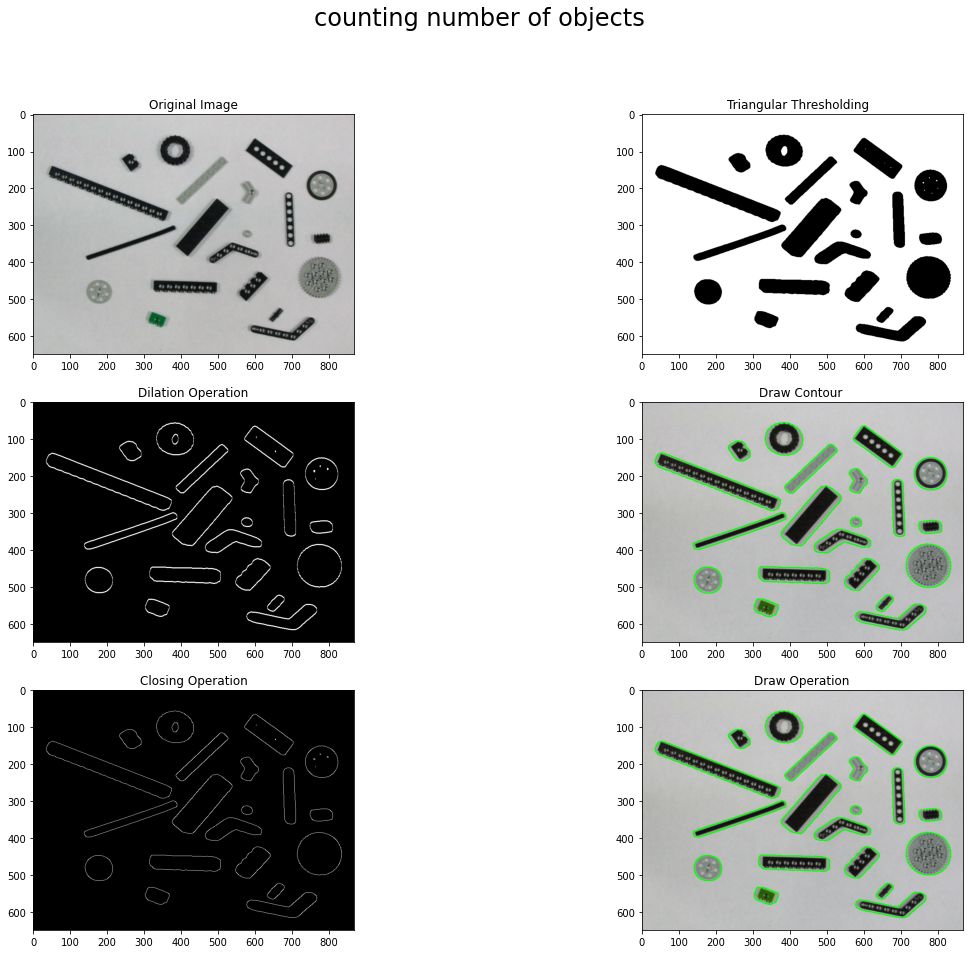

In [6]:
method = [cv2.THRESH_TRIANGLE] # using traingle thresholding method to do basic segmentation in an image, and to binarize it.
names = ['counting number of objects']

def thresh(img_path, method, index):
    # binarizes image

    img = cv2.imread(path +'lego1.png')
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # converting image to gray
    blurred = cv2.GaussianBlur(gray, (9, 9), 2) # blurring the image using gaussian

     # threshold & canny edge detection.

    ret, img_masked = cv2.threshold(blurred, 0, 255, method) # Run thresholding, returning the masked imag
    print(f"Threshold: {ret}") #print the value of threshold

    canny = cv2.Canny(img_masked, 0, ret, 3 ) #using canny edge detection on the traingle thresholding image eith the value calculated in the above code 

    
    dilation = cv2.dilate(canny , (2,2), iterations=2) # preform morphological image processing (dilation operation )to increase the white region  
    closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4)) # closing operation 

    # calculate & detectiig objects using opencv contours function for dilation operation 
    (cnt, hierarchy) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting image to rgb
    cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2) # drawing countours from boundary points >> -1 to draw all contours 
    print("objects in the image using dilation = ", len(cnt)) #display no. of objects

    
    # calculate & detectiig objects using opencv contours function for closing operation
    (cnt1, hierarchy) = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting image to rgb
    cv2.drawContours(rgb1, cnt1, -1, (0, 255, 0), 2) # drawing countours from boundary points >> -1 to draw all contours 
    print("objects in the image using closing = ", len(cnt1)) #display no. of objects


    # plot the images
    fig, ax = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle(names[index], fontsize=24)
    ax[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax[0,0].title.set_text('Original Image')
    ax[0,1].imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)), ax[0,1].title.set_text('Triangular Thresholding  ')
    ax[1,0].imshow(dilation, cmap='gray'), ax[1,0].title.set_text('Dilation Operation')
    ax[1,1].imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)), ax[1,1].title.set_text('Draw Contour ')
    ax[2,0].imshow(closing, cmap='gray'), ax[2,0].title.set_text('Closing Operation')
    ax[2,1].imshow(cv2.cvtColor(rgb1, cv2.COLOR_BGR2RGB)), ax[2,1].title.set_text('Draw Operation')
    
    
    

for index, method in enumerate(method):
    thresh('lego.png', method, index)

# **FLOWCHART OF THE ABOVE CODE**

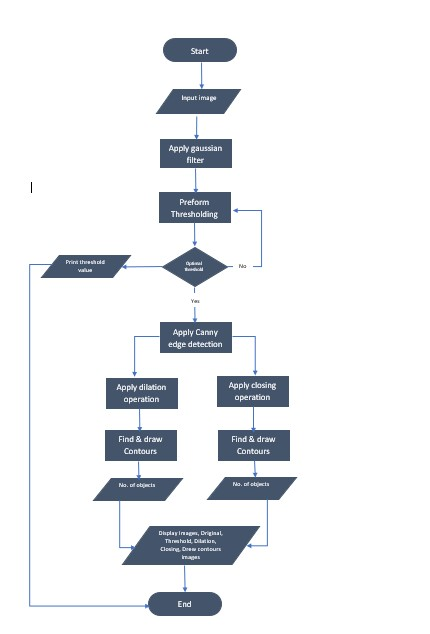